In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
sns.set_style("whitegrid")
# Bigger font
# sns.set_context("poster")
sns.set_context("talk")
# Figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4
# np.random.seed(123)

Things to consider regarding the metric:

- Optimize the model for the metric.
- There are tricks to boost the score after the modeling by using the metric for the competition.

### Constant Model

When the prediction is a constant.

This **optimal constant** is key when it comes to taking advantage of the metric.

The error for this constant model is called **constant baseline**.

## a. MSE, RMSE, and $R^2$

- In general, it is easier to work with MSE than with RMSE.
- But they can be interchangeable.

#### The gradient
- For gradient-based models, as a loss function, the gradient of RMSE is a little more complex, so MSE is preferred.

MSE is the most common metric. It's best value is 0, and there is one that simply its square root: RMSE.

#### Why the square root?

The square root is introduced **to make the scale of the error to be the same as the scale of the target**.

In [2]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred))
print(np.sqrt(mean_squared_error(y_true, y_pred)))

0.375
0.6123724356957945


#### Sensitive to outliers

MSE and RMSE are very sensitive to outliers.

In [3]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 200, 8]
print(mean_squared_error(y_true, y_pred))
print(np.sqrt(mean_squared_error(y_true, y_pred)))

9801.375
99.0018939212781


#### R-squared or $R^2$

R-squared values range from 0 to 1, and it measures how close the data are to the fitted regression line. The closer to 1, the better.

- When MSE = 0, $R^2$ = 1.
- When computing the MSE of a constant model (the average), then $R^2$ = 0.

This is a better way to evaluate models.

- $R^2$ is the normalized version of MSE.
- People use MSE for reporting because it is the loss-function models minimize.
- $R^2$ is useful because it is often easier to interpret since it doesn't depend on the scale of the data. So $R^2$ would make it easier to state which model is performing better.

#### Optimal constant = Mean

The constant prediction that makes and optimal MSE is the average 
$y$.

In [4]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
## CONSTANT MODEL
prediction = np.mean(y_true)
y_pred = np.ones(4)*prediction
mean_squared_error(y_true, y_pred)

7.296875

In [5]:
r2_score(y_true, y_pred)

0.0

## b. MAE

- Less sentitive to outliers
- It is widely used in finance where $\$10$ error is exactly two times worse than $\$5$ error.
- MAE is easier to justify.

#### The gradient

Its derivative is the step function.

The gradient is not defined when the prediction is perfect, so formally MAE is not differentiable, but there's a simple "if" workaround when $y_i = \hat{y}_i$

The second derivative is non-defined as well.

In [6]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

#### Optimal constant = Median

It is the median of the target values.

In [7]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

## CONSTANT MODEL
prediction = np.median(y_true)
y_pred = np.ones(4)*prediction
mean_absolute_error(y_true, y_pred)

2.125

- Do you have outliers (which are not values that should be ignored) in the data? Use MAE.
- Are they just unexpected values we should care about? Use MSE.

## c. Mean Square Percentage Error ((R)MSPE)

If $y = 10$ and $\hat{y} = 9$, then MSE = 1  
If $y = 1000$ and $\hat{y} = 999$, then MSE = 1

Probably, we consider that difference of 1 more significant in the first case because it's a smaller value. Then MSE or MAE wouldn't be a good metric because **MSE works with absolute errors**.

#### Relative error

If $y = 10$ and $\hat{y} = 9$, then relative_error = 1  
If $y = 1000$ and $\hat{y} = 900$, then relative_error = 1

errors.png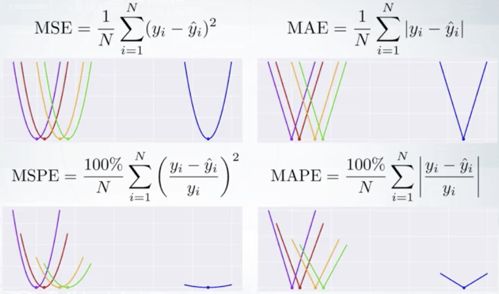

- As the target increases, the cost becomes less
- (R)MSPE and MAPE are weighted versions.

#### Optimal constant = Weighted mean of the target values

## d. Mean Absolute Percentage Error (MAPE)

The same as with (R)MSPE, but with absolute values.

#### Optimal constant = Weighted median of the target vector

## e. Root mean square logarithmic error ((R)MSLE)

A constant "1" is added because log(0) is not defined.

Used for the same situation as MSPE and MAPE.

rmsle.png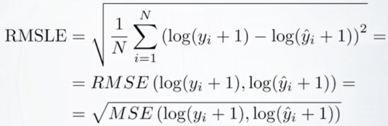

#### Optimal constant = It is the mean target value exponentiated